In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from keras.metrics import RootMeanSquaredError,MeanSquaredError, MeanAbsoluteError
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from LLS import LLS
from LLS import my_train_test_split
import dataframe_image as dfi

In [172]:
data = pd.read_csv('input\Dollar_Rial_Price_Dataset.csv')
df = data.copy()
df.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"


In [173]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Date_int'] = df['Date'].dt.strftime('%Y%m%d').astype(int)
df['Date_int'] = df['Date'].map(lambda date:f'{365*date.year + 30*date.month + date.day}') 
df['Close'] = df['Close'].str.replace(',', '')
df['Close'] = df['Close'].astype(int)

In [174]:
presidency_periods = [
    {'president': 'Ahmadinejad', 'start': '2005-08-03', 'end': '2013-08-03'},
    {'president': 'Rouhani', 'start': '2013-08-04', 'end': '2021-08-03'},
    {'president': 'Raisi', 'start': '2021-08-04', 'end': '2024-05-19'}
]


def get_president(date):
    for period in presidency_periods:
        if (pd.to_datetime(period['start']) <= date <= pd.to_datetime(period['end'])):
            return period['president']
    return 'Unknown'

df['President'] = df['Date'].apply(get_president)

In [175]:
mask_ahmadi = (df['President'] == 'Ahmadinejad')  
df_ahmadi = df.loc[mask_ahmadi]
df_ahmadi.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_int,President
0,0,2011-11-27,1390/09/06,"13,700","13,700","13,700",13700,734372,Ahmadinejad
1,1,2011-11-28,1390/09/07,"13,440","13,440","13,440",13440,734373,Ahmadinejad
2,2,2011-11-29,1390/09/08,"13,350","13,350","13,350",13350,734374,Ahmadinejad
3,3,2011-11-30,1390/09/09,"13,400","13,400","13,400",13400,734375,Ahmadinejad
4,4,2011-12-01,1390/09/10,"13,500","13,500","13,500",13500,734376,Ahmadinejad


In [176]:
mask_rouhani = (df['President'] == 'Rouhani')  
df_rouhani = df.loc[mask_rouhani]
df_rouhani.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_int,President
483,483,2013-08-04,1392/05/13,"32,650","32,400","32,800",32400,734989,Rouhani
484,484,2013-08-05,1392/05/14,"32,150","31,900","32,200",32000,734990,Rouhani
485,485,2013-08-06,1392/05/15,"31,900","31,750","31,950",31900,734991,Rouhani
486,486,2013-08-07,1392/05/16,"32,050","32,050","32,350",32250,734992,Rouhani
487,487,2013-08-08,1392/05/17,"32,300","32,100","32,350",32150,734993,Rouhani


In [177]:
mask_raisi = (df['President'] == 'Raisi')  
df_raisi = df.loc[mask_raisi]
df_raisi.head()

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_int,President
2858,2858,2021-08-04,1400/05/13,"257,250","254,690","257,340",256190,737909,Raisi
2859,2859,2021-08-05,1400/05/14,"256,490","255,790","256,740",256190,737910,Raisi
2860,2860,2021-08-07,1400/05/16,"254,190","253,990","257,140",256380,737912,Raisi
2861,2861,2021-08-08,1400/05/17,"256,290","252,390","257,440",256890,737913,Raisi
2862,2862,2021-08-09,1400/05/18,"256,340","256,190","259,940",259090,737914,Raisi


### Highest Dollar prices for each president

In [178]:
highest_dollar = df.groupby('President')['Close'].idxmax()
highest_dollar = df.loc[highest_dollar]

highest_dollar['Close'] = highest_dollar['Close'].apply(lambda x: "{:,}".format(x))
highest_dollar

# dfi.export(highest_dollar,'output/highest_dollar_per_president.png')


,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_int,President
347,347,2013-01-31,1391/11/12,"37,800","37,800","38,900","38,900",734806,Ahmadinejad
3257,3257,2023-05-01,1402/02/11,"548,860","548,800","555,600","550,510",738546,Raisi
2627,2627,2020-10-18,1399/07/27,"317,030","316,950","320,060","318,560",737618,Rouhani


### Lowest dollar price for each president

In [225]:
lowest_dollar = df.groupby('President')['Close'].idxmin()
lowest_dollar = df.loc[lowest_dollar]

lowest_dollar['Close'] = lowest_dollar['Close'].apply(lambda x: "{:,}".format(x))
lowest_dollar
# dfi.export(lowest_dollar,'output/lowest_dollar_per_president.png')

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close,Date_int,President
2,2,2011-11-29,1390/09/08,"13,350","13,350","13,350","13,350",734374,Ahmadinejad
3032,3032,2022-03-06,1400/12/15,"252,610","251,250","254,300","253,830",738126,Raisi
621,621,2014-01-20,1392/10/30,"29,230","28,880","29,230","28,880",735160,Rouhani


### LLS

In [180]:
def evaluate_each_pres(data):
    X = data[['Date_int']].to_numpy(dtype=int)
    y = data[['Close']].to_numpy(dtype=int)
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=.2)

    lls = LinearRegression()
    lls.fit(X_train, Y_train)

    y_pred = lls.predict(X_test)
    mae = metrics.mean_absolute_error(Y_test, y_pred)
    return mae


In [181]:
print(f'Ahmadinejad MAE: {evaluate_each_pres(df_ahmadi)}')
print(f'Rouhani MAE: {evaluate_each_pres(df_rouhani)}')
print(f'Raisi MAE: {evaluate_each_pres(df_raisi)}')

Ahmadinejad MAE: 2878.600518073426
Rouhani MAE: 31583.619981543423
Raisi MAE: 31298.935725282838


### Charts

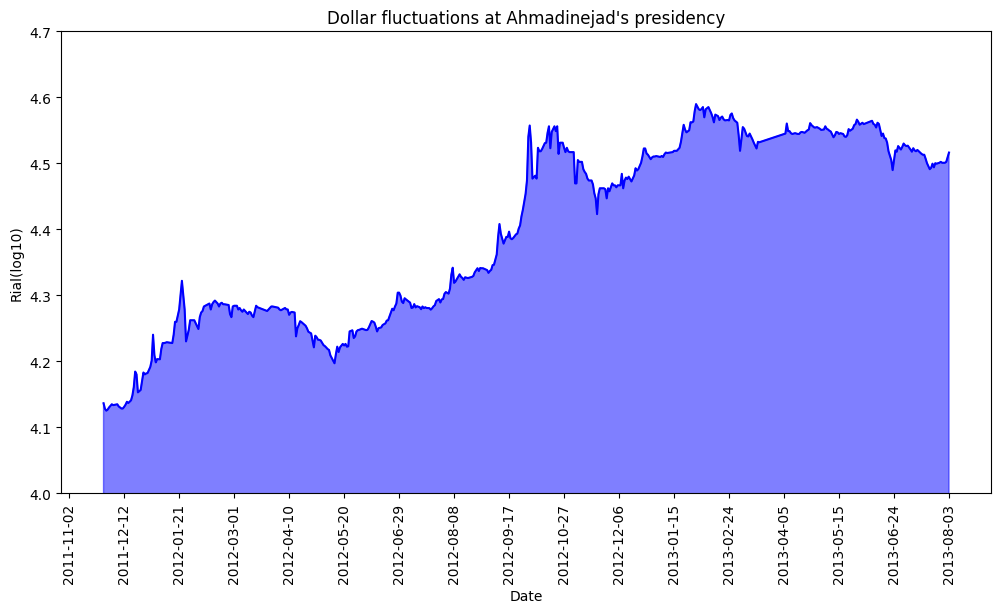

In [240]:
# Dollar fluctuations at Ahmadinejad's presidency 
plt.figure(figsize=(12,6))
plt.plot(df_ahmadi['Date'],np.log10(df_ahmadi['Close']),color='blue')
plt.fill_between(df_ahmadi['Date'],np.log10(df_ahmadi['Close']),color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rial(log10)')
plt.title("Dollar fluctuations at Ahmadinejad's presidency")
plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(20))
plt.ylim(bottom = 4, top = 4.7) 
plt.savefig('output/dollar_ahamdinejad.png')
plt.show()

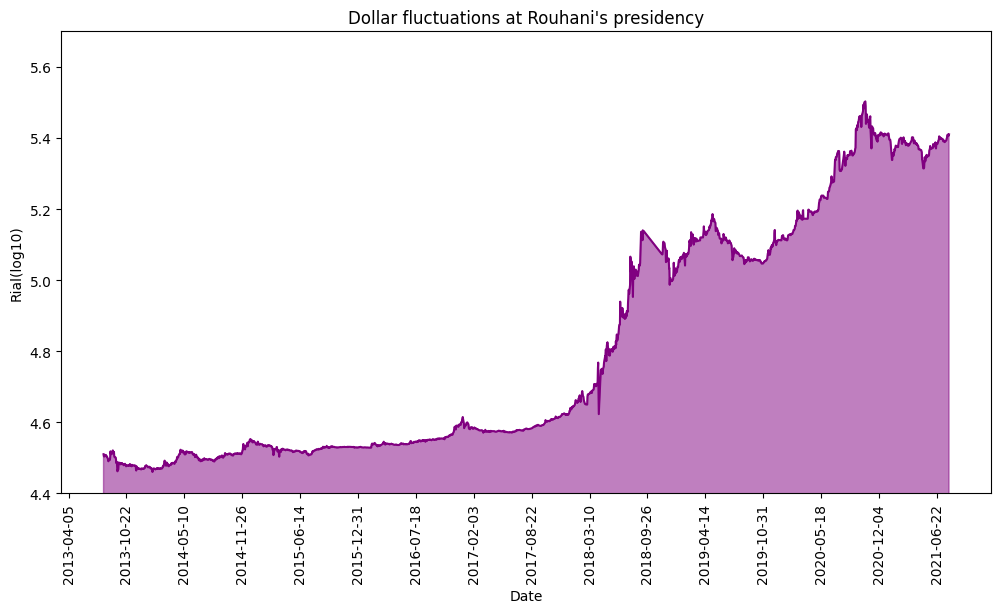

In [239]:
# Dollar fluctuations at Ahmadinejad's presidency 
plt.figure(figsize=(12,6))
plt.plot(df_rouhani['Date'],np.log10(df_rouhani['Close']),color='purple')
plt.fill_between(df_rouhani['Date'],np.log10(df_rouhani['Close']),color='purple', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rial(log10)')
plt.title("Dollar fluctuations at Rouhani's presidency")
plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(20))
plt.ylim(bottom = 4.4, top = 5.7) 
plt.savefig('output/dollar_rouhani.png')
plt.show()

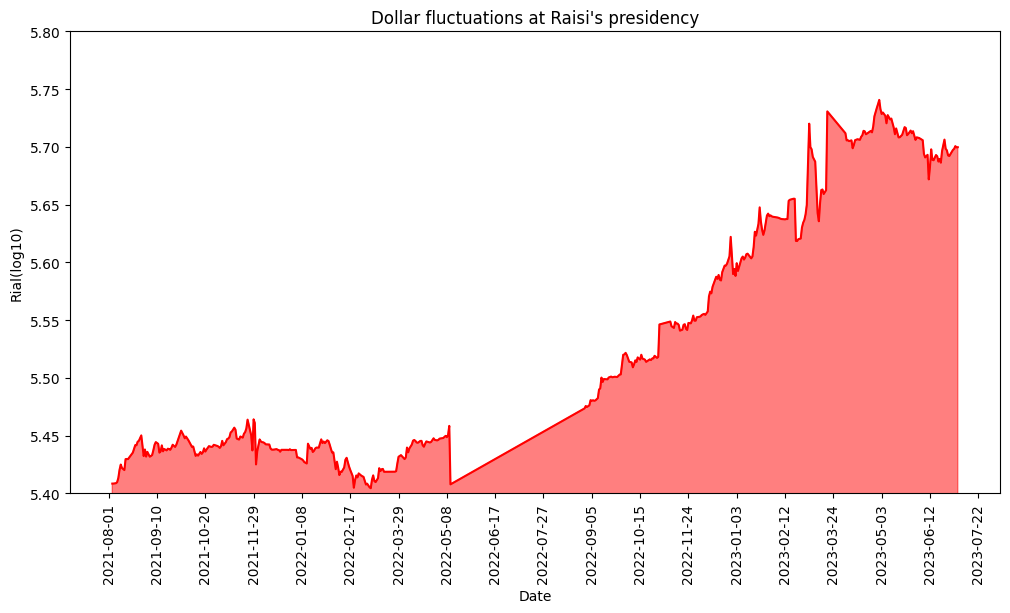

In [238]:
# Dollar fluctuations at Ahmadinejad's presidency 
plt.figure(figsize=(12,6))
plt.plot(df_raisi['Date'],np.log10(df_raisi['Close']),color='r')
plt.fill_between(df_raisi['Date'],np.log10(df_raisi['Close']),color='r', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Rial(log10)')
plt.title("Dollar fluctuations at Raisi's presidency")
plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(20))
plt.ylim(bottom = 5.4, top = 5.8) 
plt.savefig('output/dollar_raisi.png')
plt.show()

#### Comparison

C:\Users\PC-Kosar\AppData\Local\Temp\ipykernel_19840\1243363119.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xticks = pd.date_range(start='2011-10-29', end='2023-05-04', freq='6M')


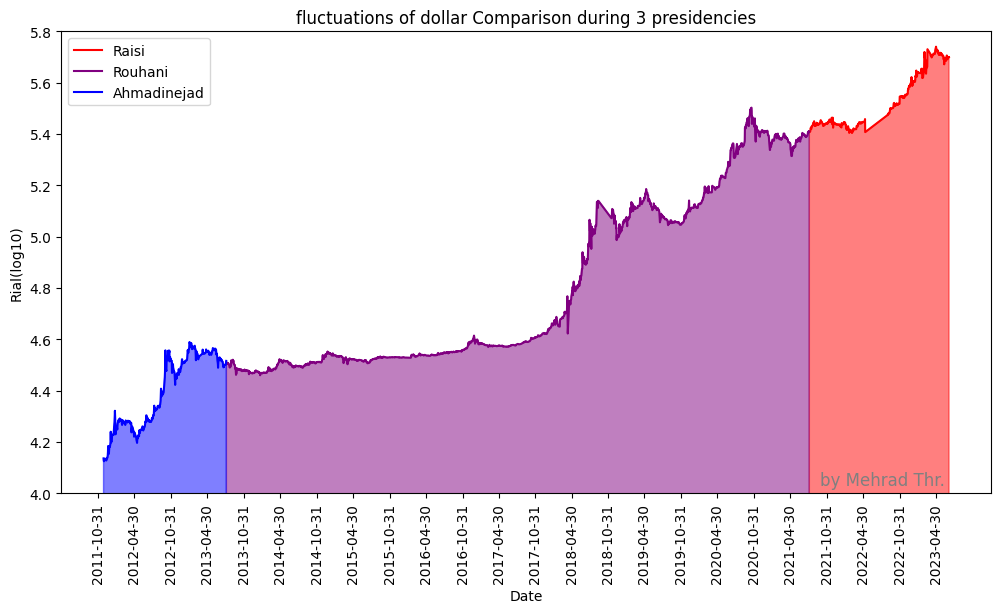

In [237]:
plt.figure(figsize=(12,6))
plt.plot(df_raisi['Date'],np.log10(df_raisi['Close']),color='r',label='Raisi')
plt.fill_between(df_raisi['Date'],np.log10(df_raisi['Close']),color='r', alpha=0.5)

plt.plot(df_rouhani['Date'],np.log10(df_rouhani['Close']),color='purple',label='Rouhani')
plt.fill_between(df_rouhani['Date'],np.log10(df_rouhani['Close']),color='purple', alpha=0.5)

plt.plot(df_ahmadi['Date'],np.log10(df_ahmadi['Close']),color='blue',label='Ahmadinejad')
plt.fill_between(df_ahmadi['Date'],np.log10(df_ahmadi['Close']),color='blue', alpha=0.5)

plt.text(0.95, 0.01, 'by Mehrad Thr.', verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes, color='gray', fontsize=12, alpha=1)
plt.xlabel('Date')
plt.ylabel('Rial(log10)')
plt.title("fluctuations of dollar Comparison during 3 presidencies")
xticks = pd.date_range(start='2011-10-29', end='2023-05-04', freq='6M')
plt.xticks(xticks, rotation='vertical')
plt.ylim(bottom = 4, top = 5.8) 
plt.legend()
plt.savefig('output/dollar_comparison.png')
plt.show()